<a href="https://colab.research.google.com/github/eriqneo/Portfolio-Projects/blob/main/Blockchain2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import json
import pandas as pd
import matplotlib
from scipy.stats import linregress


from matplotlib import pyplot as plt

In [10]:
#Load data from file

with open('n-transactions.json', 'r') as f:
  data = json.load(f)

transaction_data = data['n-transactions']

#convert data to dataframe

df = pd.DataFrame(transaction_data)

#df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

df.head()

,x,y
0,1675036800000,309909
1,1675123200000,313500
2,1675209600000,345561
3,1675296000000,340169
4,1675382400000,315951


In [11]:
#change datatype to datetime and colun name to timestamp
df['timestamp'] = pd.to_datetime(df['x'], unit='ms')

#clear the name column 'x'
df.drop(columns=['x'], inplace=True)

#Rename 'y' column to transactions
df.rename(columns={'y': 'transactions'}, inplace=True)

df.head(10)

,transactions,timestamp
0,309909,2023-01-30
1,313500,2023-01-31
2,345561,2023-02-01
3,340169,2023-02-02
4,315951,2023-02-03
5,304495,2023-02-04
6,254113,2023-02-05
7,301977,2023-02-06
8,300429,2023-02-07
9,316963,2023-02-08


In [12]:
import numpy as np
#lets check if there is missing data

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{}-{}'.format(col,pct_missing))


transactions-0.0
timestamp-0.0


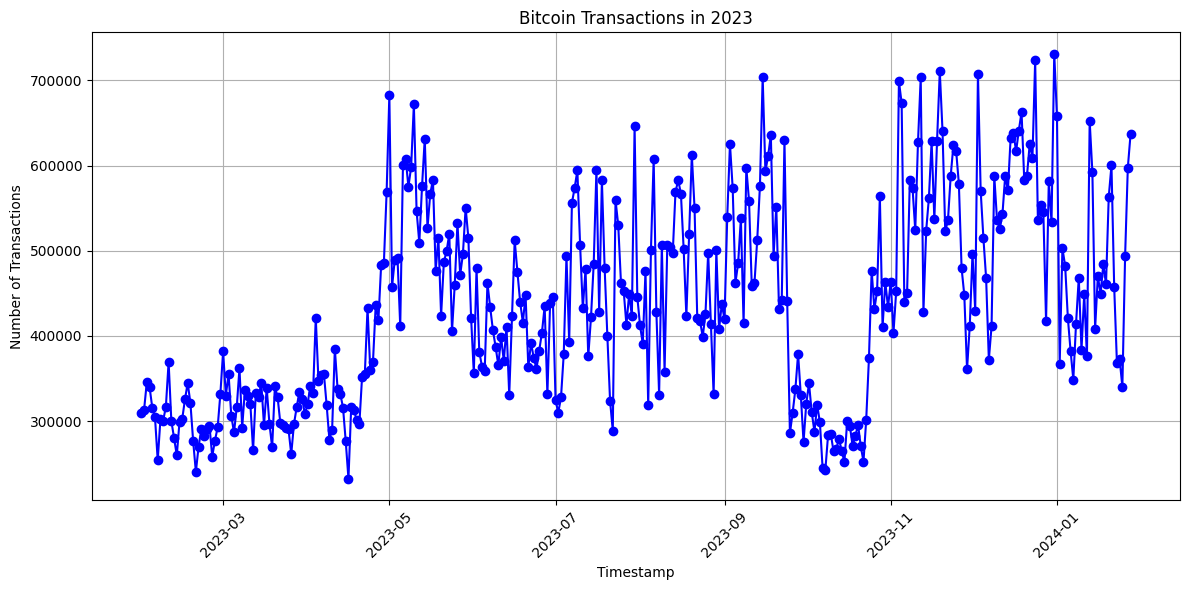

In [13]:
# Visualize Transaction Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['transactions'], color='blue', marker='o', linestyle='-')
plt.title('Bitcoin Transactions in 2023')
plt.xlabel('Timestamp')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# prompt: Using dataframe df: find highest transcation and in which date

df[df['transactions'] == df['transactions'].max()]['timestamp']


335   2023-12-31
Name: timestamp, dtype: datetime64[ns]

In [15]:
# Find the index of the row with the highest transaction
max_transaction_index = df['transactions'].idxmax()

# Get the corresponding timestamp using the index
highest_transaction_timestamp = df.loc[max_transaction_index, 'timestamp']

# Get the value of the highest transaction
highest_transaction_value = df.loc[max_transaction_index, 'transactions']

print("Highest Transaction:")
print("Timestamp:", highest_transaction_timestamp)
print("Transaction Value:", highest_transaction_value)


Highest Transaction:
Timestamp: 2023-12-31 00:00:00
Transaction Value: 731351


In [16]:
# Find the index of the row with the highest transaction
min_transaction_index = df['transactions'].idxmin()

# Get the corresponding timestamp using the index
lowest_transaction_timestamp = df.loc[min_transaction_index, 'timestamp']

# Get the value of the highest transaction
lowest_transaction_value = df.loc[min_transaction_index, 'transactions']

print("Lowest Transaction:")
print("Timestamp:", lowest_transaction_timestamp)
print("Transaction Value:", lowest_transaction_value)


Lowest Transaction:
Timestamp: 2023-04-16 00:00:00
Transaction Value: 232268


Lets do statistical analysis for this data


In [17]:
#Headline
print ("Statistical Analysis")

#Mean Transsaction Value
mean_transc = df['transactions'].mean()
print("Mean Transaction Value:", mean_transc)

#Median Transaction Value
median_transc = df['transactions'].median()
print("Median Transaction Value:", median_transc)

# Standard deviation of transaction values
std_dev_transc = df['transactions'].std()
print("Standard Deviation of Transaction Values:", std_dev_transc)

# Total number of transactions
total_transc = df['transactions'].sum()
print("Total Number of Transactions:", total_transc)


Statistical Analysis
Mean Transaction Value: 435387.51923076925
Median Transaction Value: 423163.0
Standard Deviation of Transaction Values: 118387.83339379649
Total Number of Transactions: 158481057


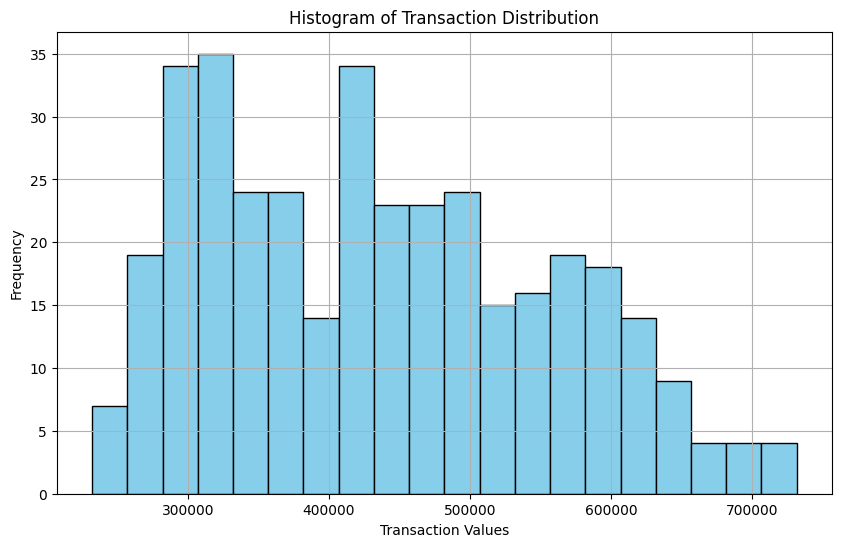

In [18]:
# Histogram of Transaction Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['transactions'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Transaction Distribution')
plt.xlabel('Transaction Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Right skewed histogram
#highest no. of less transactions on the left
#see right side, extremely hightransactions that are few
#


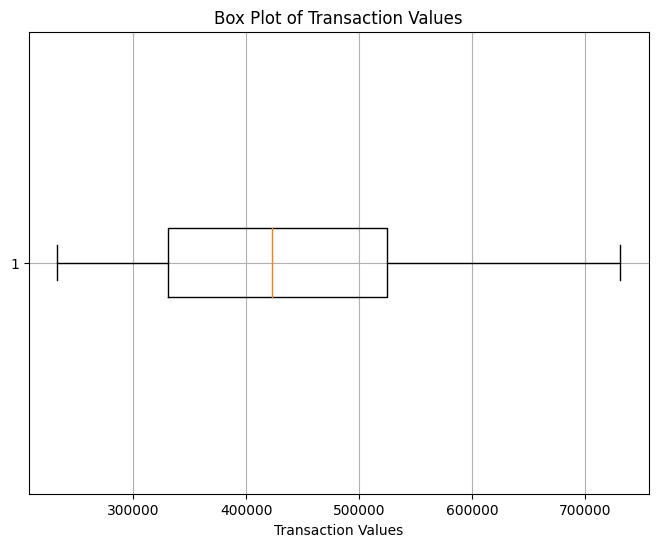

In [19]:
# Box Plot of Transaction Values
plt.figure(figsize=(8, 6))
plt.boxplot(df['transactions'], vert=False)
plt.title('Box Plot of Transaction Values')
plt.xlabel('Transaction Values')
plt.grid(True)
plt.show()

#right whisker longer than left whisker indicates, positively skewed data
#The median (Q2) is closer to the lower quartile (Q1) than to the upper quartile (Q3), reflecting the skewness of the data towards the lower values
#

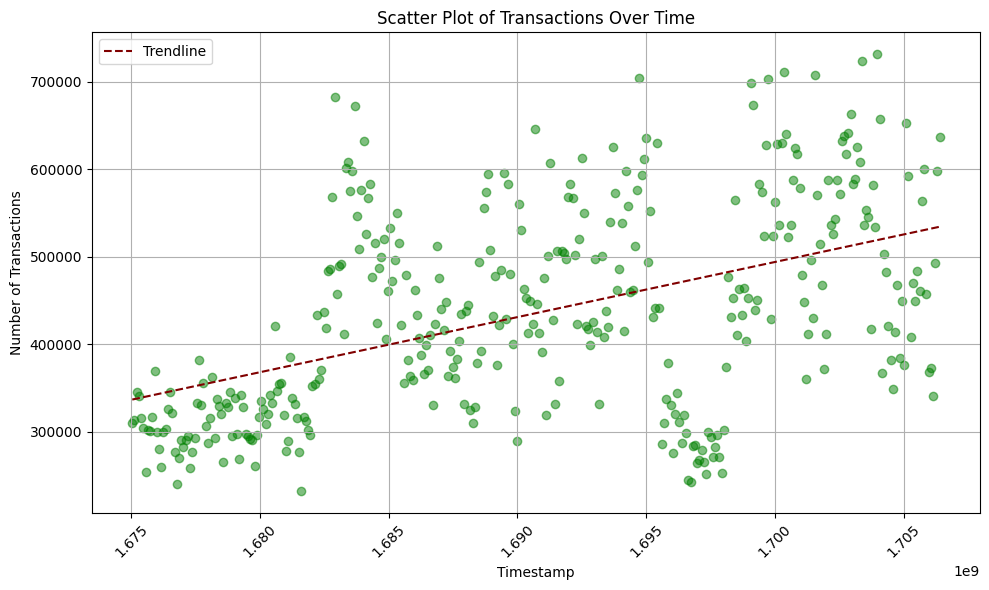

In [27]:
# Convert timestamps to numerical values
df['timestamp_numeric'] = df['timestamp'].astype(np.int64) // 10**9  # Convert to seconds

# Scatter Plot of Transactions Over Time
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamp_numeric'], df['transactions'], color='green', alpha=0.5)
plt.title('Scatter Plot of Transactions Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(df['timestamp_numeric'], df['transactions'])
x_values = np.array(df['timestamp_numeric'])
y_values = intercept + slope * x_values

# Plot the trendline in maroon color
plt.plot(x_values, y_values, color='maroon', linestyle='--', label='Trendline')

plt.legend()  # Show legend for the trendline
plt.tight_layout()
plt.show()


"""
Positive Relationship:

    The positive slope of the trend line indicates that as the values of 'timestamp_numeric' increase (from left to right), the values of 'transactions' also tend to increase.
    In other words, there is a general trend of increasing number of transactions over time.

Directionality of the Trend:

    The left-to-right directionality of the trend line suggests that there is a consistent pattern of growth or increase in transactions as time progresses.
    This pattern may indicate factors such as business growth, increased market demand, or other time-dependent phenomena leading to higher transaction volumes.

Strength of the Relationship:

    The strength of the relationship between 'timestamp_numeric' and 'transactions' is quantified by the correlation coefficient (r_value). A value close to 1 indicates a strong positive correlation.

Validity of the Trend:

        It's essential to consider the context of the data and the time frame covered by the 'timestamp_numeric' variable to assess the validity and relevance of the observed trend.
     External factors such as seasonality, market trends, or specific events may influence the observed relationship and should be taken into account in interpretation.
"""


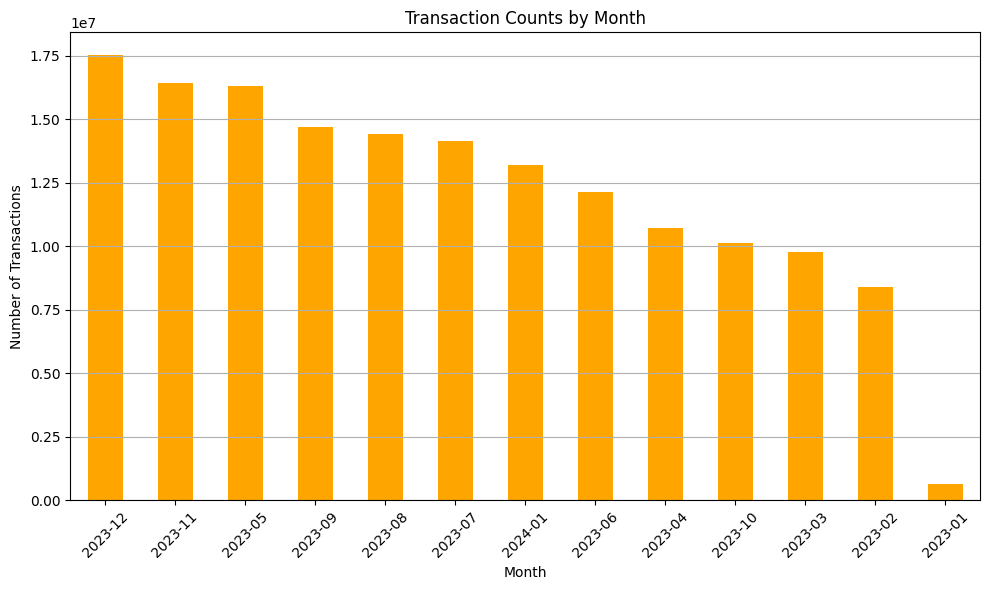

In [25]:
# Bar Chart of Transaction Counts by Time Period (e.g., month)
df['month'] = df['timestamp'].dt.to_period('M')  # Group by month
transaction_counts = df.groupby('month')['transactions'].sum()
# Sort the transaction counts by month in descending order
sorted_transaction_counts = transaction_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_transaction_counts.plot(kind='bar', color='orange')
plt.title('Transaction Counts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()